In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pandas as pd
import re
import urllib.parse

# Data getting and prepareing
Get the list of commune in the Northern part of Norway.

In [4]:
url = "https://www.kartverket.no/kunnskap/Fakta-om-Norge/Fylker-og-kommuner/Tabell/"

# Open with beautiful Soup and parese the data into a dataframe
data_list = []
with urlopen(url) as response:

    soup = BeautifulSoup(response, 'html.parser')
    table = soup.find_all('table')
    table = table[0] 
    for row in table.find_all('tr'):
        td = row.findChildren('td')
        if(len(td)> 2):
            data_list +=[{
                'Region id':td[0].text,
                'Region':td[1].text,
                'Commune id':td[2].text.strip(),
                'Commune':td[3].text.strip()
            }]

communes = pd.DataFrame(data_list)

In [5]:
# Clean the commune data
communes['Commune id'] = communes['Commune id'].str.replace('Nr. ','')
communes['Region id'] = communes['Region id'].str.replace('Nr. ','')
communes = communes[(communes.Region == 'Nordland') | (communes.Region == 'Troms – Romsa') | (communes.Region == 'Finnmark – Finnmárku')] 

def cleanNorwegianName(row):
    """
    Where Sami and Norwegian name is given, get the norwegian one.
    """
    if row == 'Divtasvuodna – Tysfjord': return 'Tysfjord'
    if row == 'Hamarøy – Hábmer': return 'Hamarøy'
    if row == 'Sortland – Suortá': return 'Sortland'
    if row == 'Harstad – Hárstták': return 'Harstad'
    if row == 'Fauske – Fuossko': return 'Fauske'
    if row == 'Bø': return 'Bø_(Nordland)'
    if row == 'Loabák – Lavangen': return 'Lavangen'
    if row == 'Storfjord – Omasvuotna – Omasvuono': return 'Storfjord'
    if row == 'Gáivuotna – Kåfjord – Kaivuono': return 'Kåfjord'
    if row == 'Berg': return 'Berg_(Troms)'
    if row == 'Porsanger – Porsá?gu – Porsanki': return 'Porsanger'
    if row == 'Kárášjohka – Karasjok': return 'Karasjok'
    if row == 'Deatnu – Tana': return 'Tana'
    if row == 'Unjárga – Nesseby': return 'Nesseby'
    if row == 'Herøy': return 'Herøy_(Nordland)'
    if row == 'Guovdageaidnu – Kautokeino': return 'Kautokeino'
    
    return row

communes['Commune'] = communes['Commune'].apply(cleanNorwegianName)
communes.to_csv('communes.csv', encoding = 'utf-8', index=None)

Getting coordinates from Wikipeida

In [6]:

communes = pd.read_csv('communes.csv', encoding='UTF-8')

def wikiCoordinatesLong(commune):
    """
    Getting lattitude from Wiki-page
    """
    try:
        wikiurl = 'https://no.wikipedia.org/wiki/'+urllib.parse.quote(commune)

        with urlopen(wikiurl) as response:
            soup = BeautifulSoup(response, 'html.parser')
            long = soup.findAll('a', {'class':'mw-kartographer-maplink'})[0]['data-lon']
            return long
    except:
        print("{} can not find wiki page with coordinates.".format(commune))
        return None
    
    return None


def wikiCoordinatesLat(commune):
    """
    Getting longditude from Wiki-page
    """
    try:
        wikiurl = 'https://no.wikipedia.org/wiki/'+urllib.parse.quote(commune)
        with urlopen(wikiurl) as response:
            soup = BeautifulSoup(response, 'html.parser')
            lat = soup.findAll('a', {'class':'mw-kartographer-maplink'})[0]['data-lat']
            return lat
    except:
        print("{} can not find wiki page with coordinates.".format(commune))
        return None
    
    return None

communes['lat'] = communes['Commune'].apply(wikiCoordinatesLat)
communes['long'] = communes['Commune'].apply(wikiCoordinatesLong)

communes # display the list with coordinates

,Commune,Commune id,Region,Region id,lat,long
0,Bodø,1804,Nordland,18,67.28333282,14.38333321
1,Narvik,1805,Nordland,18,68.4363,17.3983
2,Bindal,1811,Nordland,18,65.096666666667,12.588611111111
3,Sømna,1812,Nordland,18,65.323611111111,12.177222222222
4,Brønnøy,1813,Nordland,18,65.475833333333,12.400277777778
5,Vega,1815,Nordland,18,65.675277777778,11.957777777778
6,Vevelstad,1816,Nordland,18,65.668333333333,12.518611111111
7,Herøy_(Nordland),1818,Nordland,18,65.98427,12.28916
8,Alstahaug,1820,Nordland,18,65.956666666667,12.572777777778
9,Leirfjord,1822,Nordland,18,66.112777777778,13.130833333333


In [7]:
# parse to numeric values
communes['lat'] = pd.to_numeric(communes['lat'])
communes['long'] = pd.to_numeric(communes['long'])


## Add data with population from a different source
Getting the population data got from the [Norwegian Open statistics](https://www.ssb.no/befolkning) and merge it with the main dataset and call it for df from now on. 

In [8]:
population = pd.read_csv('norway_pop.csv', sep=";", encoding='latin1')
population = population.reset_index()
population.columns = ['Commune', 'Population']
population = population.iloc[1:, :] # remove first row

def extractID(c):
    """
    Extract the commune id from string
    """
    try:
        return c.split(" ")[0]
    except:
        return None

population['Commune id'] = population['Commune'].apply(extractID)
population['Commune id'] = population['Commune id'].astype(str)
communes['Commune id'] = communes['Commune id'].astype(str)
population['Population'] = population['Population'].astype(int)

df = communes.merge(population, on='Commune id',suffixes=('','_p'))
df = df[['Commune','Commune id', 'Region','Region id','lat','long','Population']]
df.to_csv('communes2.csv',sep=";", index=False)
df.sort_values('Population',ascending=False)

,Commune,Commune id,Region,Region id,lat,long,Population
45,Tromsø,1902,Troms – Romsa,19,69.666667,18.933333,76649
0,Bodø,1804,Nordland,18,67.283333,14.383333,52024
16,Rana,1833,Nordland,18,66.366667,14.333333,26315
44,Harstad,1903,Troms – Romsa,19,68.799694,16.544306,24827
72,Alta,2012,Finnmark – Finnmárku,20,69.976667,23.295833,20665
1,Narvik,1805,Nordland,18,68.436300,17.398300,18630
10,Vefsn,1824,Nordland,18,65.799167,13.250556,13403
59,Lenvik,1931,Troms – Romsa,19,69.383611,17.967500,11679
36,Vestvågøy,1860,Nordland,18,68.221389,13.784444,11480
70,Hammerfest,2004,Finnmark – Finnmárku,20,70.663333,23.677778,10536


# Making descriptive graphs of the data

<Figure size 864x288 with 0 Axes>

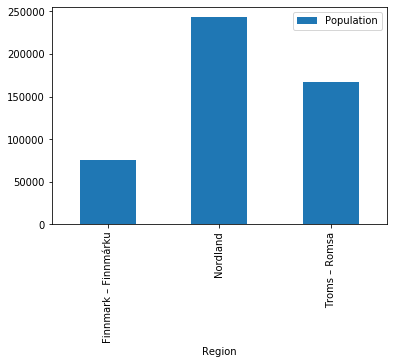

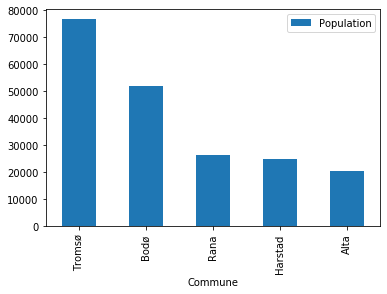

In [39]:
# simple barplot to see the size of the regions 
f = plt.figure(figsize=(12,4))

g = df.groupby('Region').sum()[['Population']]
g.plot(kind='bar')
g

bigest = df.sort_values('Population',ascending=False).iloc[0:5,:].set_index('Commune')
bigest = bigest[['Population']]

bigest.plot(kind='bar')

## Plotting corrdinates on map

Text(0, 0.5, 'Lat')

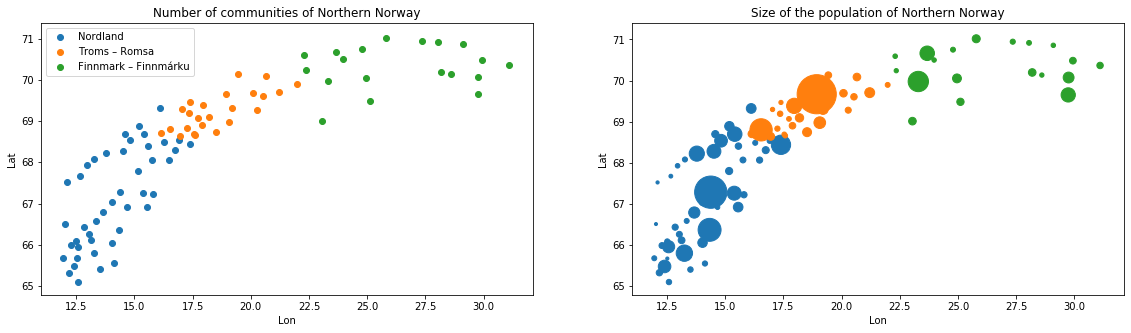

In [229]:
fig = plt.figure(figsize=(30,5))
plt.subplot(1, 3, 1)
for region in df['Region'].drop_duplicates():
    c = df[df.Region == region]
    ax = plt.scatter(c['long'], c['lat'], label=region)

plt.legend()
plt.title('Number of communities of Northern Norway')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(1, 3, 2)
for region in df['Region'].drop_duplicates():
    c = df[df.Region == region]
    ax = plt.scatter(c['long'], c['lat'], s=c['Population']/50, label=region)
plt.title('Size of the population of Northern Norway')
plt.xlabel('Lon')
plt.ylabel('Lat')



# Compute K-means
Compute one and two centeres for the optimal point to place the capital city. 

In [205]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [276]:
# Compute for one K , one center
k_coordinates = KMeans(1)
k_coordinates.fit(df[['long','lat']])
center = k_coordinates.cluster_centers_[0]

# Compute for two K, two centers
k_coordinates2 = KMeans(2)
k_coordinates2.fit(df[['long','lat']])
centers = k_coordinates2.cluster_centers_
centers_x = [p[0] for p in centers]
centers_y = [p[1] for p in centers]

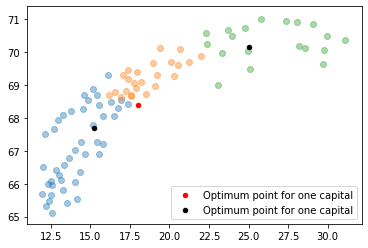

In [277]:
for region in df['Region'].drop_duplicates():
    c = df[df.Region == region]
    ax = plt.scatter(c['long'], c['lat'], alpha=0.4)
    
plt.scatter(x=center[0],y=center[1], s=20, c='r', marker='o', label='Optimum point for one capital')
plt.scatter(x=centers_x,y=centers_y, s=20, c='k', marker='o', label='Optimum point for one capital')
plt.legend()

In [279]:
# Compute the shortest distance to the optimal center and display top 5 candidates wihtout population taken in mind
def distanceToCenter(row):
    return distance.euclidean(center, [row['long'],row['lat']])

def distanceTo2Center1(row):
    return distance.euclidean(centers[0], [row['long'],row['lat']])

def distanceTo2Center2(row):
    return distance.euclidean(centers[1], [row['long'],row['lat']])

df['distance_1k'] = df.apply(distanceToCenter, axis=1)
df['distance_2k1'] = df.apply(distanceTo2Center1, axis=1)
df['distance_2k2'] = df.apply(distanceTo2Center2, axis=1)


## Distance to the 1K center

In [284]:
df.sort_values('distance_1k').iloc[0:10,:]

,Commune,Commune id,Region,Region id,lat,long,Population,distance_1k,distance_2k1,distance_2k2
50,Lavangen,1920,Troms – Romsa,19,68.657778,17.583611,1042,0.511731,2.564867,7.600379
52,Salangen,1923,Troms – Romsa,19,68.900556,17.893056,2183,0.512469,2.944751,7.251049
49,Gratangen,1919,Troms – Romsa,19,68.690036,17.541747,1105,0.564089,2.538546,7.635111
51,Bardu,1922,Troms – Romsa,19,68.743889,18.519167,4030,0.594659,3.475106,6.667118
1,Narvik,1805,Nordland,18,68.436300,17.398300,18630,0.631838,2.314075,7.828043
54,Sørreisa,1925,Troms – Romsa,19,69.091944,18.193611,3489,0.704765,3.297689,6.923030
55,Dyrøy,1926,Troms – Romsa,19,69.066944,17.741389,1129,0.720465,2.882286,7.373793
48,Ibestad,1917,Troms – Romsa,19,68.829444,17.245833,1375,0.890428,2.333553,7.900863
59,Lenvik,1931,Troms – Romsa,19,69.383611,17.967500,11679,0.979005,3.236269,7.108483
56,Tranøy,1927,Troms – Romsa,19,69.191389,17.362222,1513,1.030107,2.623887,7.732249


## Distance to 2K centers

In [282]:
df.sort_values('distance_2k1').iloc[0:10,:]

,Commune,Commune id,Region,Region id,lat,long,Population,distance_1k,distance_2k1,distance_2k2
26,Steigen,1848,Nordland,18,67.798333,15.171944,2576,2.921510,0.106832,10.141178
24,Fauske,1841,Nordland,18,67.258889,15.391389,9760,2.876885,0.475829,10.070246
27,Hamarøy,1849,Nordland,18,68.066667,15.766667,1747,2.288158,0.672007,9.501021
25,Sørfold,1845,Nordland,18,67.220556,15.808611,1975,2.517677,0.768525,9.683137
29,Lødingen,1851,Nordland,18,68.404167,15.571389,2077,2.458050,0.796277,9.624083
23,Saltdal,1840,Nordland,18,66.920000,15.560000,4657,2.882362,0.853962,10.013619
37,Vågan,1865,Nordland,18,68.278056,14.520833,9595,3.510958,0.898069,10.680187
0,Bodø,1804,Nordland,18,67.283333,14.383333,52024,3.815198,0.920355,11.032793
38,Hadsel,1866,Nordland,18,68.535000,14.825000,8091,3.207011,0.920426,10.337299
22,Beiarn,1839,Nordland,18,66.917222,14.674722,1022,3.670459,0.943227,10.855705


In [283]:
df.sort_values('distance_2k2').iloc[0:10,:]

,Commune,Commune id,Region,Region id,lat,long,Population,distance_1k,distance_2k1,distance_2k2
78,Porsanger,2020,Finnmark – Finnmárku,20,70.052222,24.955833,3944,7.119209,10.030750,0.137747
76,Måsøy,2018,Finnmark – Finnmárku,20,70.750722,24.785156,1235,7.150859,10.054603,0.634517
79,Karasjok,2021,Finnmark – Finnmárku,20,69.481944,25.105000,2673,7.156816,10.059120,0.688360
75,Kvalsund,2017,Finnmark – Finnmárku,20,70.498972,23.973944,988,6.302009,9.205252,1.109768
77,Nordkapp,2019,Finnmark – Finnmárku,20,71.016667,25.783333,3218,8.181412,11.086511,1.134095
70,Hammerfest,2004,Finnmark – Finnmárku,20,70.663333,23.677778,10536,6.082494,8.976562,1.443178
72,Alta,2012,Finnmark – Finnmárku,20,69.976667,23.295833,20665,5.495464,8.405375,1.747249
71,Kautokeino,2011,Finnmark – Finnmárku,20,69.011667,23.043333,2924,5.050276,7.947313,2.300300
80,Lebesby,2022,Finnmark – Finnmárku,20,70.945278,27.351111,1328,9.661192,12.572473,2.445678
73,Loppa,2014,Finnmark – Finnmárku,20,70.239444,22.348611,917,4.691982,7.582091,2.685119


## K-means computation with population as a part of the algorithem

In [293]:
# Compute for one K , one center
k_coordinates = KMeans(1)
k_coordinates.fit(df[['long','lat','Population']])
center = k_coordinates.cluster_centers_[0]

# Compute for two K, two centers
k_coordinates2 = KMeans(2)
k_coordinates2.fit(df[['long','lat','Population']])
centers = k_coordinates2.cluster_centers_
centers_x = [p[0] for p in centers]
centers_y = [p[1] for p in centers]

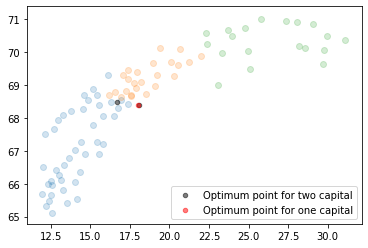

In [294]:
for region in df['Region'].drop_duplicates():
    c = df[df.Region == region]
    ax = plt.scatter(c['long'], c['lat'], alpha=0.2)

plt.scatter(x=centers_x,y=centers_y, s=20, c='k', marker='o', label='Optimum point for two capital',alpha=0.5)
plt.scatter(x=center[0],y=center[1], s=20,c='r', marker='o', label='Optimum point for one capital',alpha=0.5)

plt.legend()

In [298]:
# Compute the shortest distance to the optimal center and display top 5 candidates wihtout population taken in mind
def distanceToCenter(row):
    return distance.euclidean([center[0],center[1]], [row['long'],row['lat']])


def distanceTo2Center1(row):
    return distance.euclidean([centers[0][0],centers[0][1]], [row['long'],row['lat']])

def distanceTo2Center2(row):
    return distance.euclidean([centers[1][0],centers[1][1]], [row['long'],row['lat']])

df['distance_1k'] = df.apply(distanceToCenter, axis=1)
df['distance_2k1'] = df.apply(distanceTo2Center1, axis=1)
df['distance_2k2'] = df.apply(distanceTo2Center2, axis=1)





In [299]:
df.sort_values('distance_1k').iloc[0:5,:]

,Commune,Commune id,Region,Region id,lat,long,Population,distance_1k,distance_2k1,distance_2k2
50,Lavangen,1920,Troms – Romsa,19,68.657778,17.583611,1042,0.511731,0.540820,0.943158
52,Salangen,1923,Troms – Romsa,19,68.900556,17.893056,2183,0.512469,0.523506,1.306000
49,Gratangen,1919,Troms – Romsa,19,68.690036,17.541747,1105,0.564089,0.592976,0.909209
51,Bardu,1922,Troms – Romsa,19,68.743889,18.519167,4030,0.594659,0.569342,1.880160
1,Narvik,1805,Nordland,18,68.436300,17.398300,18630,0.631838,0.664139,0.740978


In [300]:
df.sort_values('distance_2k1').iloc[0:5,:]

,Commune,Commune id,Region,Region id,lat,long,Population,distance_1k,distance_2k1,distance_2k2
52,Salangen,1923,Troms – Romsa,19,68.900556,17.893056,2183,0.512469,0.523506,1.306000
50,Lavangen,1920,Troms – Romsa,19,68.657778,17.583611,1042,0.511731,0.540820,0.943158
51,Bardu,1922,Troms – Romsa,19,68.743889,18.519167,4030,0.594659,0.569342,1.880160
49,Gratangen,1919,Troms – Romsa,19,68.690036,17.541747,1105,0.564089,0.592976,0.909209
1,Narvik,1805,Nordland,18,68.436300,17.398300,18630,0.631838,0.664139,0.740978


In [301]:
df.sort_values('distance_2k2').iloc[0:5,:]

,Commune,Commune id,Region,Region id,lat,long,Population,distance_1k,distance_2k1,distance_2k2
32,Ballangen,1854,Nordland,18,68.306389,16.744167,2470,1.289170,1.321215,0.189201
31,Evenes,1853,Nordland,18,68.533333,16.916667,1387,1.119968,1.152206,0.264838
47,Skånland,1913,Troms – Romsa,19,68.640000,16.957222,3009,1.097332,1.129210,0.341408
44,Harstad,1903,Troms – Romsa,19,68.799694,16.544306,24827,1.536284,1.567897,0.344135
30,Tjeldsund,1852,Nordland,18,68.484444,16.292500,1259,1.738683,1.770984,0.365955
